<a id='BacktoTop'></a>
# miniLab_Online News Popularity: 

## Data Mining
## Manisha P

* Online News Popularity Dataset (https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

## Objectives:
### 1. Create Models 50/100
Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

### 2. Model Advantages 10/100
Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

### 3. Interpret Feature Importance 30/100

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

### 4. Interpret Support Vectors 10/100
Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.

## Table of Contents

#### Section 0
 * [0 - Data Set Description and Cleaning](#DataSetDescriptionandCleaning)
 * [0.1 - Import Required Packages](#ImportRequiredPackages)
 * [0.2 - Import Data Set from .CSV File and Remove Non-Predictive Fields](#ImportDatafromCSVFile&RemoveNonPredictiveFields)
 * [0.3 - Strip Leading Spaces in Column Names](#StripLeadingSpacesinColumnNames)
 * [0.4 - Initial Summary of the Dataset Attributes](#InitialSummaryoftheDatasetAttributes)
 * [0.5 - Perform Log Transformation for the Chosen Variables](#PerformLogTransformationfortheChosenVariables)
 * [0.6 - Create Binary Target Column: Popular](#CreateBinaryTargetColumn:Popular)
 * [0.7 - Simple Statistics](#SimpleStatistics)
 * [0.8 - Address Multicollinearity: Remove Interfereing Variables](#AddressMulticollinearity:RemoveInterfereingVariables) 

#### Section 1
 * [1 - Create Models](#CreateModels)
 * [1.1 - Split Training and Testing Datasets](#SplitTrainingandTestingDatasets)
 * [1.2 - Logistic Regression Models](#LogisticRegressionModelNoWeight)
 * [1.2.1 - Model 1: L2 Penalty with C=1.0 (default)](#Model1:L2penaltywithC=1.0(default))
 * [1.2.2 - Model 2: L2 Penalty with C=0.1](#Model2:L2penaltywithC=0.1)
 * [1.2.3 - Model 3: L2 Penalty with C=50](#Model3:L2penaltywithC=50)
 * [1.2.4 - Model 4: L1 Penalty with C=1](#Model4:L1penaltywithC=1)
 * [1.2.5 - Model 5: L1 Penalty with C=0.1](#Model5:L1penaltywithC=0.1)
 * [1.2.6 - Model 6: L1 Penalty with C=50](#Model6:L1penaltywithC=50)
 * [1.2.7 - Logistic Regression Models w/o Weight Accuracy Scores & Summary](#LogisticRegressionModelsNoWeightAccuracyScores&Summary)
 * [1.2.8 - Logistic Regression: DeterminingAttributeWeights](#LogisticRegression:DeterminingAttributeWeights)
 * [1.3 - Support Vector Machine Models](#SupportVectorMachineModels)
 * [1.3.1 - SVM - Model 1](#SVM-Model1)
 * [1.3.2 - SVM - Model 1](#SVM-Model1)
 * [1.3.3 - SVM - Model 1](#SVM-Model1)
 * [1.3.4 - SVM - Model 1](#SVM-Model1)
 * [1.3.5 - SVM - Model 1](#SVM-Model1)
 * [1.3.6 - Summary of SVM Models](#SummaryofSVMModels)
 
 #### Section 2
 * [2 - Model Advantages](#ModelAdvantages)

 #### Section 3
 * [3 - Interpret Feature Importance](#InterpretFeatureImportance)
 * [3.1 - List Attributes Included in Logistic Regression Model 1](#ListAttributesIncludedinLogisticRegressionModel1)
 * [3.2 - Normalize Weights for Listed Attributes From Logistic Regression Model 1](#NormalizeWeightsforListedAttributesFromLogisticRegressionModel1)
 * [3.3 - Bar Chart Showing Normalized Attributes Weights](#BarChartShowingNormalizedAttributesWeights)
 * [3.4 - Bar Chart Showing Attribute Weights Sorted By Absolute Value](#BarChartShowingAttributeWeightsSortedByAbsoluteValue)
 * [3.5 - Interpretation Of Attribute Weights](#InterpretationOfAttributeWeights)
 * [3.6 - Recommendation For Reducing Overfitting](#RecommendationForReducingOverfitting)

 #### Section 4
 * [4 - Interpret Support Vectors](#InterpretSupportVectors)
 * [4.1 - Summary Of Support Vectors From SVM Model 1](#SummaryOfSupportVectorsFromSVMModel1)
 * [4.2 - Support Vector - log_num_imgs](#SupportVector-log_num_imgs)
 * [4.3 - Support Vector - log_kw_avg_avg](#SupportVector-log_kw_avg_avg)
 * [4.4 - Support Vector - data_channel_is_entertainment](#SupportVector-data_channel_is_entertainment)
 * [4.5 - Support Vector - title_sentiment_polarity](#SupportVector-title_sentiment_polarity)

<a id='DataSetDescriptionandCleaning'></a>
### Section 0 -  Brief description of dataset preparation (data Loading and cleanup)
[Back to top of Notebook](#BacktoTop)

<a id='ImportRequiredPackages'></a>
#### 0.1 - Import Required Packages
[Back to top of Section 0](#DataSetDescriptionandCleaning)

In [1]:
# import general libraries which will be used for this miniLab project
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
from sklearn.svm import SVC

In [2]:
import time
from datetime import timedelta

start_time = time.time()

#
# Perform lots of computations.
#

elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print(msg)  

Execution took: 0:00:00 secs (Wall clock time)


<a id='ImportDatafromCSVFile&RemoveNonPredictiveFields'></a>
#### 0.2 - Import Data Set from .CSV File and Remove Non-Predictive Fields
* Removing the fields "url" & "timedelta" as they cannot help in any analysis of the data set
[Back to top of Section 0](#DataSetDescriptionandCleaning)

In [3]:
# read csv file
df = pd.read_csv("OnlineNewsPopularity.csv") 

In [4]:
# exclude 'url' and 'timedelta' columns, read from 'n_tokens_title'
df = df.loc[:, ' n_tokens_title':]

<a id='StripLeadingSpacesinColumnNames'></a>
#### 0.3 - Strip leading spaces in column names
[Back to top of Section 0](#DataSetDescriptionandCleaning)

In [5]:
# strip the leading spaces in column names
df.columns = df.columns.str.replace(' ', '')

<a id='InitialSummaryoftheDatasetAttributes'></a>
#### 0.4 - Initial summary of the dataset attributes

To perform a quick check for the presence of outliers and distribution in a dataset the dataframe.describe function from the pandas package can be used.

As shown in the code snippet below, some attributes in the dataset have extremely skewed distribution, and log transformation should be performed for good data quality.

[Back to top of Section 0](#DataSetDescriptionandCleaning)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000
average_token_length,39644.0,4.548239,0.844406,0.00000,4.478404,4.664082,4.854839,8.041534


<a id='PerformLogTransformationfortheChosenVariables'></a>
#### 0.5 - Perform log transformation for the chosen variables

For the log transformation, we follow severlrules to choose varaibles. For example, the "max" value is 10-fold larger than "50% value", and add a fixed value (e.g. 2) for negative values. The log transformed dataset is checked by df.dtypes and df.shape (39644, 59).

The original, non-transformed attribute is then removed from the analysis.

[Back to top of Section 0](#DataSetDescriptionandCleaning)

In [7]:
# find variables for log transformation based on routine rules

df_T = df.describe().T

df_T["log"] = (df_T["max"] > df_T["50%"] * 10) & (df_T["max"] > 1) # max > 10*50% value and max>1
df_T["log+2"] = df_T["log"] & (df_T["min"] < 0) # Need add 2 when min <0

df_T["scale"] = "" # make new variable 'scale' in df_T

df_T.loc[df_T["log"],"scale"] = "log" # show 'log'
df_T.loc[df_T["log+2"],"scale"] = "log+2" # show 'log+2'

df_T[["mean", "min", "50%", "max", "scale"]] # show mean, min, 50%, max, scale

,mean,min,50%,max,scale
n_tokens_title,10.398749,2.00000,10.000000,23.000000,
n_tokens_content,546.514731,0.00000,409.000000,8474.000000,log
n_unique_tokens,0.548216,0.00000,0.539226,701.000000,log
n_non_stop_words,0.996469,0.00000,1.000000,1042.000000,log
n_non_stop_unique_tokens,0.689175,0.00000,0.690476,650.000000,log
num_hrefs,10.883690,0.00000,8.000000,304.000000,log
num_self_hrefs,3.293638,0.00000,3.000000,116.000000,log
num_imgs,4.544143,0.00000,1.000000,128.000000,log
num_videos,1.249874,0.00000,0.000000,91.000000,log
average_token_length,4.548239,0.00000,4.664082,8.041534,


In [8]:
# 18 variables are log transformed

df['log_n_tokens_content'] = np.log(df['n_tokens_content'] + 0.1) # Add 0.1 to prevent infinity, same as below
df['log_n_unique_tokens'] = np.log(df['n_unique_tokens'] + 0.1) 
df['log_n_non_stop_words'] = np.log(df['n_non_stop_words'] + 0.1)
df['log_n_non_stop_unique_tokens'] = np.log(df['n_non_stop_unique_tokens'] + 0.1)

df['log_num_hrefs'] = np.log(df['num_hrefs'] + 0.1)
df['log_num_self_hrefs'] = np.log(df['num_self_hrefs'] + 0.1)
df['log_num_imgs'] = np.log(df['num_imgs'] + 0.1)
df['log_num_videos'] = np.log(df['num_videos'] + 0.1)

df['log_kw_min_min'] = np.log(df['kw_min_min'] + 2) # Add 2 for "log+2' to prevent infinity, same as below
df['log_kw_max_min'] = np.log(df['kw_max_min'] + 0.1)
df['log_kw_avg_min'] = np.log(df['kw_avg_min'] + 2)

df['log_kw_min_max'] = np.log(df['kw_min_max'] + 0.1)

df['log_kw_max_avg'] = np.log(df['kw_max_avg'] + 0.1)
df['log_kw_avg_avg'] = np.log(df['kw_avg_avg'] + 0.1)

df['log_self_reference_min_shares'] = np.log(df['self_reference_min_shares'] + 0.1)
df['log_self_reference_max_shares'] = np.log(df['self_reference_max_shares'] + 0.1)
df['log_self_reference_avg_shares'] = np.log(df['self_reference_avg_sharess'] + 0.1)

df['log_shares'] = np.log(df['shares'] + 0.1)

In [9]:
## find locations for corresponding untransformed columns
## df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 17, 18, 19, 20, 24, 25, 26, 27, 28, 58]]

In [10]:
# drop the above columns
df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 17, 18, 19, 20, 24, 25, 26, 27, 28, 58]], axis=1, inplace=True)

<a id='CreateBinaryTargetColumn:Popular'></a>
#### 0.6 - Create Binary Target Column: Popular

The median number of 'shares' is 1,400 (equal to 'log_shares' = 7.244299). Use qcut function to split two groups: 'unpopular' and 'popular'. 

The original 'log_shares' is then removed from the analysis and 'popular'has almost equal distribution of two groups.

[Back to top of Section 0](#DataSetDescriptionandCleaning)

In [11]:
# make categorical variable "popular" by cutting into 2 groups (0 = 'Unpopular', 1 = 'Popular')
df['popular'] = pd.qcut(df['log_shares'], 2, labels = ('0', '1'))

In [12]:
# get 'log_shares' position to drop
df.columns.get_loc('log_shares')

# drop "log_shares" 
df.drop(df.columns[58], axis=1, inplace=True) 

In [13]:
## df.dtypes

In [14]:
## df.shape

In [15]:
# check target variable 'popular' sample size (o = 'unpopular', 1 = 'popular')
df.groupby('popular').size()

popular
0    20082
1    19562
dtype: int64

<a id='SimpleStatistics'></a>
#### 0.7 -  Simple Statistics

For this section we first wanted to get a good understanding of the original dataset followed by taking a look at how it changed after our data cleaning and log transformation steps outlined in the Date Quality section. The thought behind doing this is take a closer look at the attribute distributions to make sure that we didn't somehow remove valuable data during this process.

From the data description as shown below, we can see all variables have the same sample size 39,644, indicating the proper data management with log transformation. The values (mean, std, min, 25%, 50%, 75% and max) for each attribute in the dataset show approximately normal distribution and reasonable standard deviations. This observation can further be confirmed with histogram for representative varaibles and used for further statistical anylysis.

[Back to top of Section 0](#DataSetDescriptionandCleaning)

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
n_tokens_title,39644.0,10.398749,2.114037,2.000000,9.000000,10.000000,12.000000,23.000000
average_token_length,39644.0,4.548239,0.844406,0.000000,4.478404,4.664082,4.854839,8.041534
num_keywords,39644.0,7.223767,1.909130,1.000000,6.000000,7.000000,9.000000,10.000000
data_channel_is_lifestyle,39644.0,0.052946,0.223929,0.000000,0.000000,0.000000,0.000000,1.000000
data_channel_is_entertainment,39644.0,0.178009,0.382525,0.000000,0.000000,0.000000,0.000000,1.000000
data_channel_is_bus,39644.0,0.157855,0.364610,0.000000,0.000000,0.000000,0.000000,1.000000
data_channel_is_socmed,39644.0,0.058597,0.234871,0.000000,0.000000,0.000000,0.000000,1.000000
data_channel_is_tech,39644.0,0.185299,0.388545,0.000000,0.000000,0.000000,0.000000,1.000000
data_channel_is_world,39644.0,0.212567,0.409129,0.000000,0.000000,0.000000,0.000000,1.000000
kw_max_max,39644.0,752324.066694,214502.129573,0.000000,843300.000000,843300.000000,843300.000000,843300.000000


In [17]:
# check duplication
df[df.duplicated()]

,n_tokens_title,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_max_max,...,log_kw_min_min,log_kw_max_min,log_kw_avg_min,log_kw_min_max,log_kw_max_avg,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_shares,popular


In [18]:
# check dataset information (59 columns with 39644 entries)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
n_tokens_title                   39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null float64
data_channel_is_socmed           39644 non-null float64
data_channel_is_tech             39644 non-null float64
data_channel_is_world            39644 non-null float64
kw_max_max                       39644 non-null float64
kw_avg_max                       39644 non-null float64
kw_min_avg                       39644 non-null float64
weekday_is_monday                39644 non-null float64
weekday_is_tuesday               39644 non-null float64
weekday_is_wednesday             39644 non-null float64
weekday_is_thursday              39644 non-null flo

<a id='AddressMulticollinearity:RemoveInterfereingVariables'></a>
#### 0.8 -  Address Multicollinearity: Remove Interfereing Variables

Eliminate multicollinearity by removing the absolute pairwise correlation > 0.6 variables ( or VIF is < 2.5 )
For the multicollinearity problem which affects our regression model, we remove the high correlated varaibles to eliminate interfering variables. Here, we use abolute pairwise correaltion > 0.6 as cut-off value which is equivalent to VIF < 2.5 (https://statisticalhorizons.com/multicollinearity)

[Back to top of Section 0](#DataSetDescriptionandCleaning)

In [19]:
# Eliminate multicollinearity by keeping variables with absolute correlation efficients <= 0.60

df_num = df.select_dtypes(['number'])

def corr_pairs(df): 
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def corr_abs(df, n = 5): 
    abs_corr = df.corr().abs().unstack()
    labels_to_drop = corr_pairs(df)
    abs_corr = abs_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return abs_corr[0:n]

n_val = 41

corr_list_drop = corr_abs(df_num, n_val) 
print("Top Absolute Correlations > 0.60\n")
print(corr_list_drop)

icor = 0
drop_column = list()
while (corr_list_drop[icor] > 0.60 and icor < len(corr_list_drop)-1):
    drop_column.append(corr_list_drop[corr_list_drop == corr_list_drop[icor]].index[0][0])
    icor += 1

drop_column = list(set(drop_column))

print("\nColumns Recommended for removal based on correlation > 0.60\n")

print("\n".join(sorted(drop_column)))

df = df.drop(drop_column, axis = 1)

# keep with abosulte correlation < 0.6 to pass

df_keep_num = df.select_dtypes(['number'])

corr_list_keep = corr_abs(df_keep_num, n_val)

print("\n\nTop Absolute Correlations < 0.60 to pass\n")
print(corr_list_keep)

Top Absolute Correlations > 0.60

log_self_reference_max_shares  log_self_reference_avg_shares    0.996506
log_self_reference_min_shares  log_self_reference_avg_shares    0.981936
log_n_unique_tokens            log_n_non_stop_unique_tokens     0.975613
log_self_reference_min_shares  log_self_reference_max_shares    0.965868
average_token_length           log_n_non_stop_words             0.940504
log_kw_max_min                 log_kw_avg_min                   0.936513
log_n_non_stop_words           log_n_non_stop_unique_tokens     0.935383
log_kw_max_avg                 log_kw_avg_avg                   0.921049
kw_min_avg                     log_kw_min_max                   0.916576
log_n_unique_tokens            log_n_non_stop_words             0.892913
log_n_tokens_content           log_n_non_stop_words             0.890318
average_token_length           log_n_non_stop_unique_tokens     0.870007
                               log_n_unique_tokens              0.848621
                 

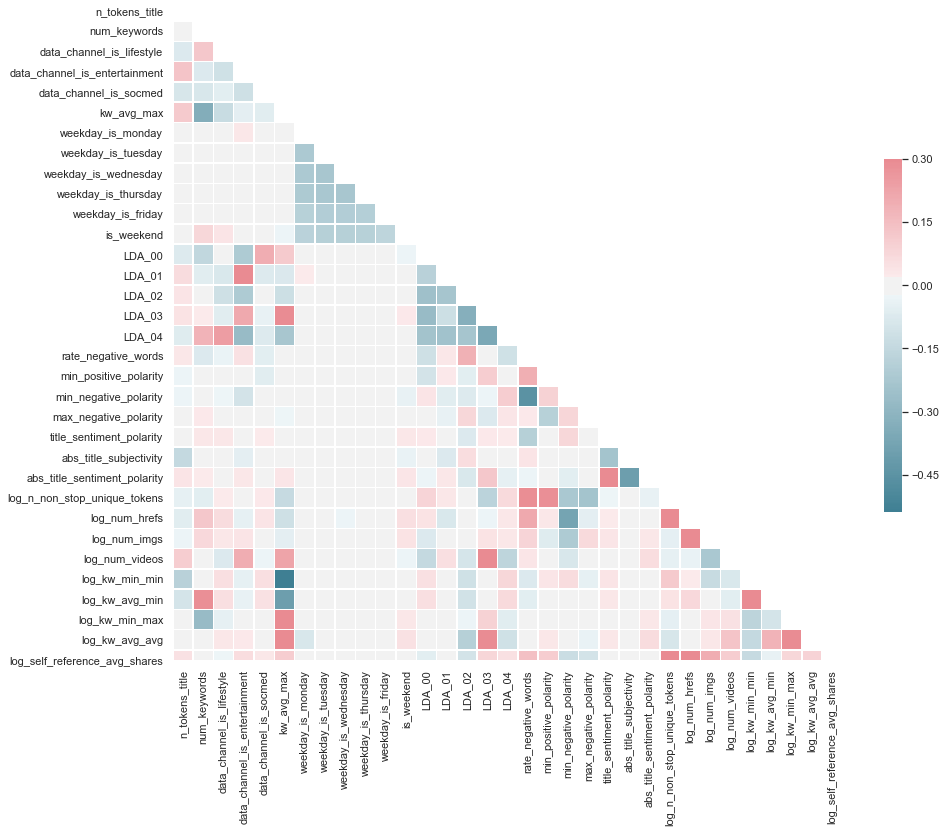

In [20]:
# correaltion heatmap for 33 leaving independent variables from eliminating multilinearity process 
# modified codes from https://www.kaggle.com/maheshdadhich/strength-of-visualization-python-visuals-tutorial/notebook

sns.set(style="white")

corr = df.corr() # compute the correlation matrix

mask = np.zeros_like(corr, dtype=np.bool) # Generate a mask for the upper triangle
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 13)) # Set up the matplotlib figure

cmap = sns.diverging_palette(220, 10, as_cmap=True) # Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<a id='CreateModels'></a>
### Section 1 - Create Models

<a id='SplitTrainingandTestingDatasets'></a>
#### 1.1 -  Split Training and Testing Datasets
 * We use the ShuffleSplit function from Sklearn to split our Dataset into training and test sets. We will perform the split 3 times and will use 80% of each split for training and 20% of each split for testing of the model 

[Back to top of Section 1](#CreateModels)

In [21]:
# split training and testing datasets by ShuffleSplit

from sklearn.model_selection import ShuffleSplit

# Set up the X and class label y which to be numpy matrices by using values
if 'popular' in df:
    y = df['popular'].values # set 'popular' as dependent
    del df['popular'] # get rid of the class label
    X = df.values # use everything else to predict!

       
    
# set up instances of object which will be able to split the data into training and testing splits
num_cv_iterations = 3 # 3 folds
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations, test_size  = 0.2) # 80% / 20% training / test
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


<a id='LogisticRegressionModelNoWeight'></a>
#### 1.2 Logistic Regression Model (not considering weight)

Run 6 models with different parameters as shown below:

 1. [Model 1:](#Model1:L2penaltywithC=1.0(default)) 
     * L2 penalty 
     * C = 1.0 (default)
 2. [Model 2:](#Model2:L2penaltywithC=0.1) 
     * L2 penalty
     * C = 0.1
 3. [Model 3:](#Model3:L2penaltywithC=50)
     * L2 penalty
     * C = 50
 4. [Model 4:](#Model4:L1penaltywithC=1) 
     * L1 penalty
     * C = 1
 5. [Model 5:](#Model5:L1penaltywithC=0.1) 
     * L1 penalty
     * C = 0.1
 6. [Model 6:](#Model6:L1penaltywithC=50) 
     * L1 penalty
     * C = 50¶

[Back to top of Section 1](#CreateModels)

<a id='Model1:L2penaltywithC=1.0(default)'></a>
##### 1.2.1 - Model 1: L2 penalty with C = 1.0 (default)

In [22]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first create a reusable logisitic regression object
# setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# use the cv_object that we setup before to iterate through the different training and testing sets. 
# Each time we will reuse the logisitic regression object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    
    # create new variables
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
#  accuracy will be different in each run because it randomly creates a new training and testing data set

C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 0  ====
accuracy 0.584815235212511
confusion matrix
 [[2486 1465]
 [1827 2151]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 1  ====
accuracy 0.6162189431201917
confusion matrix
 [[2372 1621]
 [1422 2514]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.6221465506369025
confusion matrix
 [[2525 1548]
 [1448 2408]]


In [23]:
# shorter syntax for the logistic regression analysis as above

start_time_m1 = time.time()

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

end_time_m1 = time.time() - start_time_m1
used_time_m1= "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(end_time_m1))
print(used_time_m1) 

C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 0  ====
accuracy 0.6273174423004162
confusion matrix
 [[2530 1452]
 [1503 2444]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 1  ====
accuracy 0.6208853575482406
confusion matrix
 [[2476 1534]
 [1472 2447]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.6202547610039097
confusion matrix
 [[2521 1462]
 [1549 2397]]
Execution took: 0:00:04 secs (Wall clock time)


<a id='Model2:L2penaltywithC=0.1'></a>
##### 1.2.2. - Model 2: L2 penalty with C = 0.1

In [24]:
lr_clf2 = LogisticRegression(penalty='l2', C=0.1, class_weight=None) # get object

iter_num2=0

start_time_m2 = time.time()

for iter_num2, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat2 = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num2," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat2)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat2))
    
end_time_m2 = time.time() - start_time_m2
used_time_m2= "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(end_time_m2))
print(used_time_m2) 

C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 0  ====
accuracy 0.6198764030773112
confusion matrix
 [[2455 1559]
 [1455 2460]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 1  ====
accuracy 0.6208853575482406
confusion matrix
 [[2474 1517]
 [1489 2449]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.6252995333585571
confusion matrix
 [[2496 1594]
 [1377 2462]]
Execution took: 0:00:04 secs (Wall clock time)


<a id='Model3:L2penaltywithC=50'></a>
##### 1.2.3 - Model 3: L2 penalty with C = 50

In [25]:
lr_clf3 = LogisticRegression(penalty='l2', C=50, class_weight=None) # get object

iter_num3=0

start_time_m3 = time.time()

for iter_num3, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat3 = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num3," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat3)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat3))
    
end_time_m3 = time.time() - start_time_m3
used_time_m3= "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(end_time_m3))
print(used_time_m3) 

C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 0  ====
accuracy 0.6198764030773112
confusion matrix
 [[2521 1481]
 [1533 2394]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 1  ====
accuracy 0.623155505107832
confusion matrix
 [[2473 1555]
 [1433 2468]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.6189935679152478
confusion matrix
 [[2445 1544]
 [1477 2463]]
Execution took: 0:00:03 secs (Wall clock time)


<a id='Model4:L1penaltywithC=1'></a>
##### 1.2.4 - Model 4: L1 penalty with C = 1

In [26]:
lr_clf4 = LogisticRegression(penalty='l1', C=1, class_weight=None) # get object

iter_num4=0

start_time_m4 = time.time()

for iter_num4, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat4 = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num3," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat4)) 

    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat4))
    
end_time_m4 = time.time() - start_time_m4
used_time_m4= "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(end_time_m4))
print(used_time_m4) 

C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.6188674486063817
confusion matrix
 [[2490 1488]
 [1534 2417]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.629209231933409
confusion matrix
 [[2502 1551]
 [1389 2487]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.6293353512422752
confusion matrix
 [[2558 1550]
 [1389 2432]]
Execution took: 0:00:04 secs (Wall clock time)


<a id='Model5:L1penaltywithC=0.1'></a>
##### 1.2.5 - Model 5: L1 penalty with C = 0.1

In [27]:
lr_clf5 = LogisticRegression(penalty='l1', C=0.1, class_weight=None) # get object

iter_num5=0

start_time_m5 = time.time()

for iter_num5, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat5 = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num3," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat5)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat5))
    
end_time_m5 = time.time() - start_time_m5
used_time_m5= "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(end_time_m5))
print(used_time_m5) 

C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.6210114768571068
confusion matrix
 [[2506 1453]
 [1552 2418]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.6048682053222348
confusion matrix
 [[2538 1431]
 [1702 2258]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.6235338630344306
confusion matrix
 [[2425 1567]
 [1418 2519]]
Execution took: 0:00:03 secs (Wall clock time)


<a id='Model6:L1penaltywithC=50'></a>
##### 1.2.6 - Model 6: L1 penalty with C = 50

In [28]:
lr_clf6 = LogisticRegression(penalty='l1', C=50, class_weight=None) # get object

iter_num6=0

start_time_m6 = time.time()

for iter_num6, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat6 = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num3," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat5)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat6))
    
end_time_m6 = time.time() - start_time_m6
used_time_m6= "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(end_time_m6))
print(used_time_m6) 

C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.5030899230672216
confusion matrix
 [[2507 1538]
 [1417 2467]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.48480262328162443
confusion matrix
 [[2365 1609]
 [1478 2477]]


C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


====Iteration 2  ====
accuracy 0.5003152982721655
confusion matrix
 [[2502 1525]
 [1489 2413]]
Execution took: 0:00:03 secs (Wall clock time)


<a id='LogisticRegressionModelsNoWeightAccuracyScores&Summary'></a>
##### 1.2.7 - Logistic Regression Model Accuracy Scores & Summary

###### Model Accuracy Scores 
 1. [Model 1:](#Model1:L2penaltywithC=1.0(default)) 
     * L2 penalty 
     * C = 1.0 (default)
         * Accuracy of: 0.6280
     * execution time = 0:00:03 secs
 2. [Model 2:](#Model2:L2penaltywithC=0.1) 
     * L2 penalty
     * C = 0.1
          * Accuracy of: 0.6380
     * execution time = 0:00:02 secs
 3. [Model 3:](#Model3:L2penaltywithC=50)
     * L2 penalty
     * C = 50
         * Accuracy of: 0.6192
     * execution time = 0:00:03 secs
 4. [Model 4:](#Model4:L1penaltywithC=1) 
     * L1 penalty
     * C = 1
         * Accuracy of: 0.6329
     * execution time = 0:00:02 secs
 5. [Model 5:](#Model5:L1penaltywithC=0.1) 
     * L1 penalty
     * C = 0.1
         * Accuracy of: 0.6317
     * execution time = 0:00:03 secs
 6. [Model 6:](#Model6:L1penaltywithC=50) 
     * L1 penalty
     * C = 50¶
         * Accuracy of: 0.5017
     * execution time = 0:00:03 secs

###### Summary
 * Most Accurate Model:
     * The most accurate of our six Logistic Regression Models was Model Number 2 that had an L2 penalty and C = .1
     
     Interperitation:
         Our most accurate logistic regression model is able predict whether an article is popular or not 63.8% of the time.  
     
     Penalty - Regularization penalty
     
     C - Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
     
 * Least Accurate Model:
     * The least accurate of our six Logistic Regression Models was Model Number 6 that had an L1 penalty and C = 50

<a id='SupportVectorMachineModels'></a>
#### 1.3 Support Vector Machines

<a id='SVM-Model1'></a>
##### 1.3.1 SVM - Model 1 ( kernel='rbf', C=0.5, degree=3, gamma='auto' )
Test the top 33 weighted variables from the logistic regression model as declared above 

In [30]:
from sklearn.preprocessing import StandardScaler

# normalize the features based upon the mean and standard deviation of each column. 
 
# scale attributes by the training set
scl_obj = StandardScaler()


# run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

In [31]:
# investigate SVMs on the data and play with the parameters and kernels

from sklearn.svm import SVC

start_time_svm1 = time.time()

svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

end_time_svm1 = time.time() - start_time_svm1
used_time_svm1= "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(end_time_svm1))
print(used_time_svm1) 

accuracy: 0.6529196620002522
[[2670 1386]
 [1366 2507]]
Execution took: 0:02:24 secs (Wall clock time)


In [32]:
# check the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )


(24444, 33)
(24444,)
[12207 12237]


In [33]:
# look at the instances that were chosen as support vectors

# make a dataframe of the training data
df_tested_on = df.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]


df_support['popular'] = y[svm_clf.support_] # add back in the 'popular' Column to the pandas dataframe
df['popular'] = y # also add it back in for the original data 
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24444 entries, 33561 to 12234
Data columns (total 34 columns):
n_tokens_title                   24444 non-null float64
num_keywords                     24444 non-null float64
data_channel_is_lifestyle        24444 non-null float64
data_channel_is_entertainment    24444 non-null float64
data_channel_is_socmed           24444 non-null float64
kw_avg_max                       24444 non-null float64
weekday_is_monday                24444 non-null float64
weekday_is_tuesday               24444 non-null float64
weekday_is_wednesday             24444 non-null float64
weekday_is_thursday              24444 non-null float64
weekday_is_friday                24444 non-null float64
is_weekend                       24444 non-null float64
LDA_00                           24444 non-null float64
LDA_01                           24444 non-null float64
LDA_02                           24444 non-null float64
LDA_03                           24444 non-null

C:\Users\Sohum Pednekar\projNlp\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


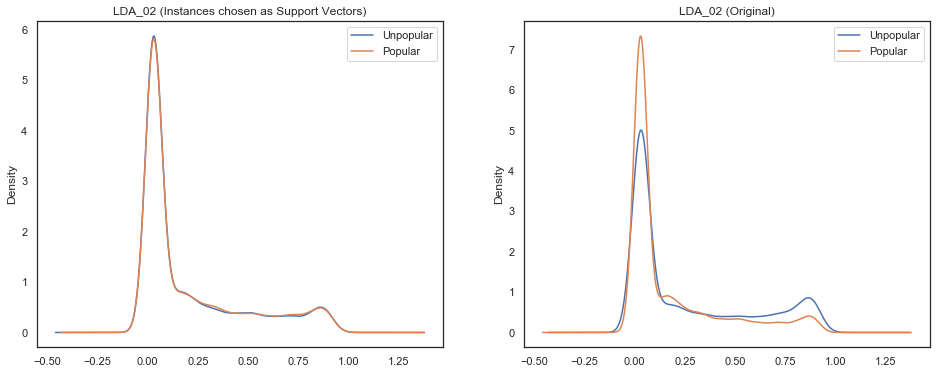

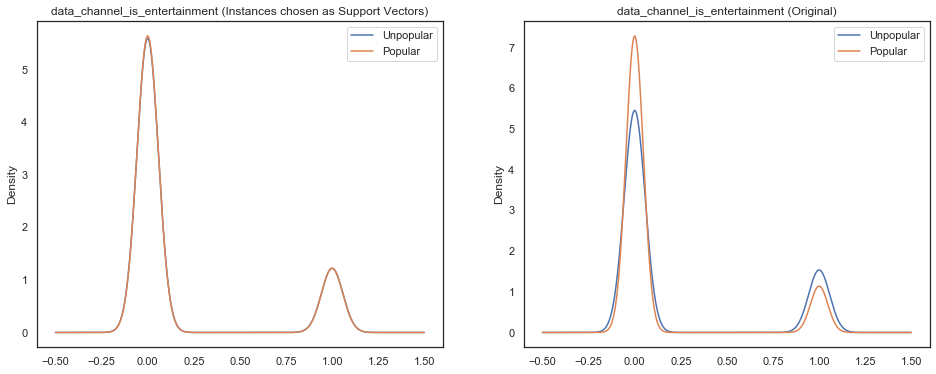

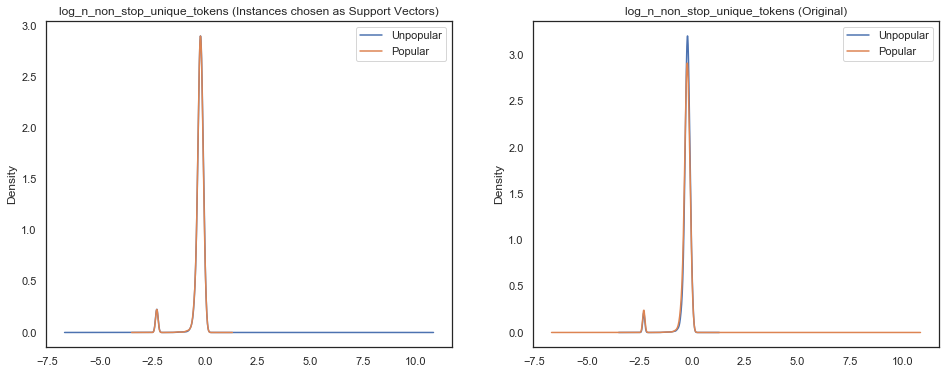

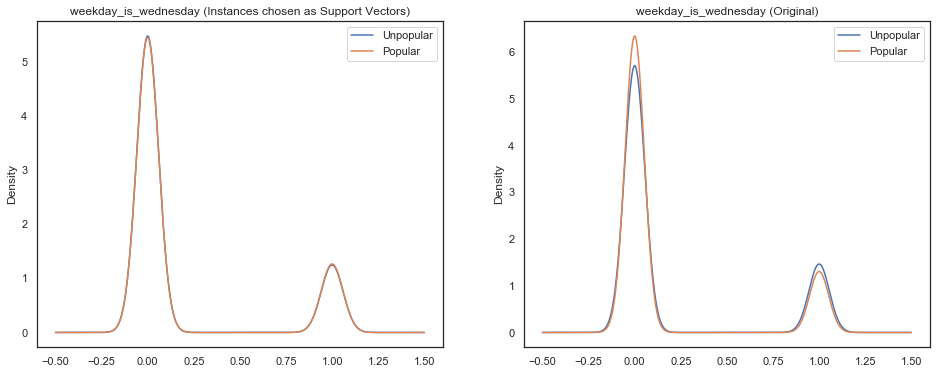

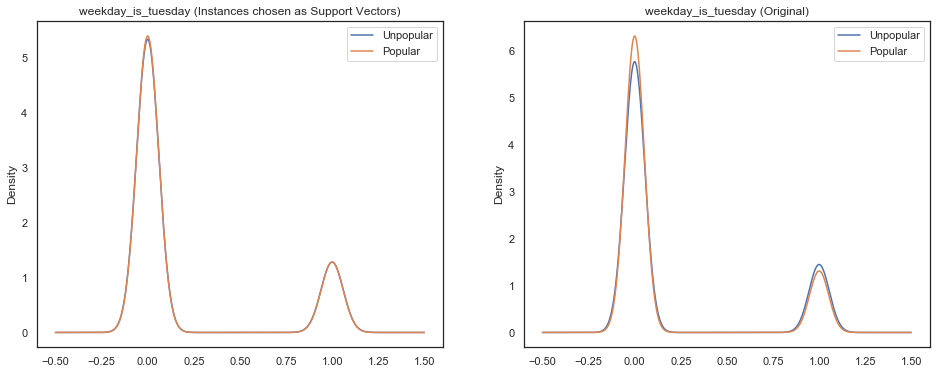

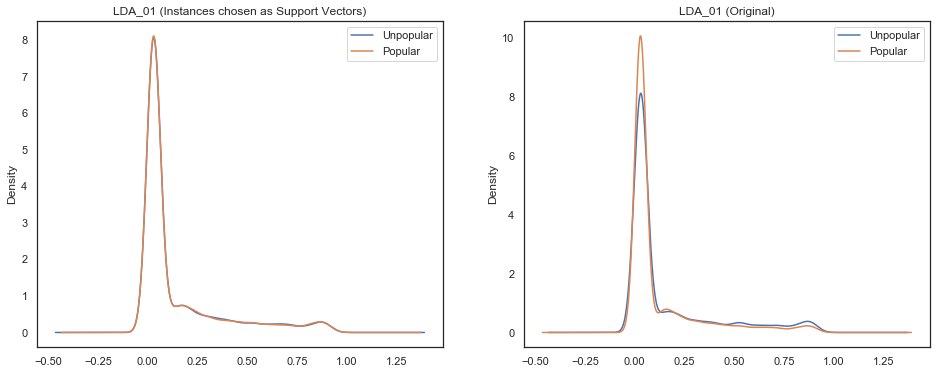

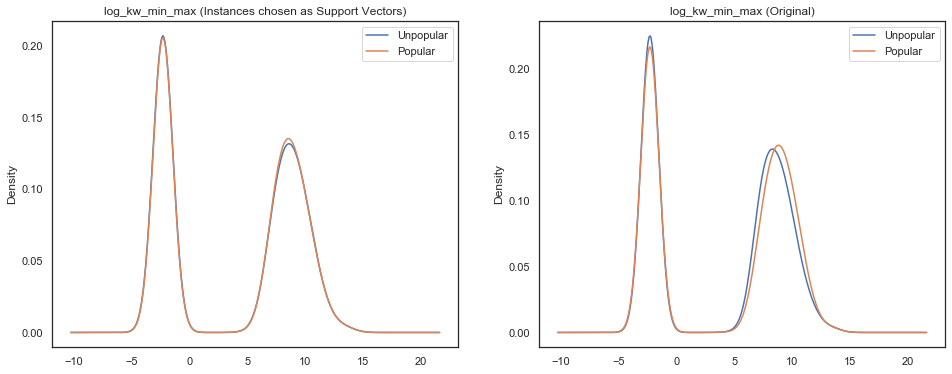

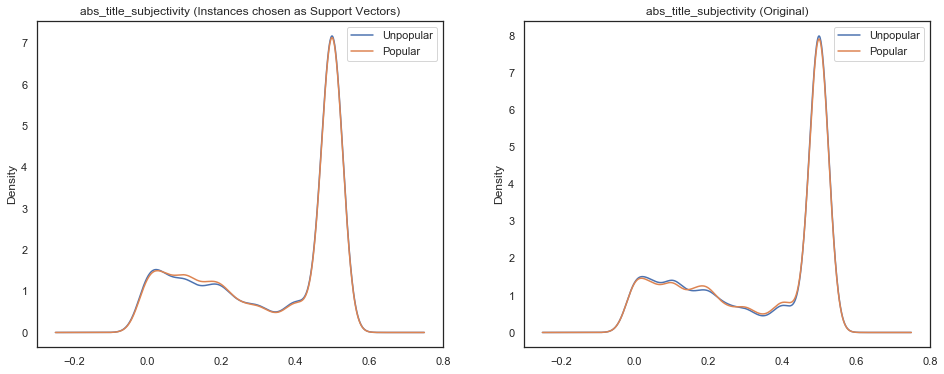

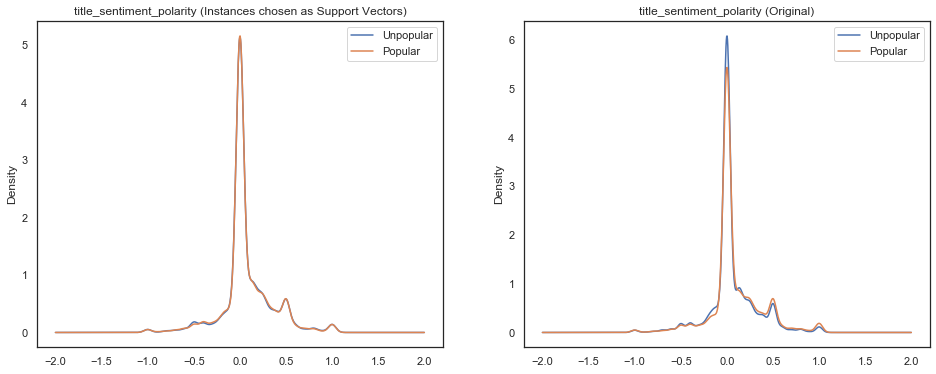

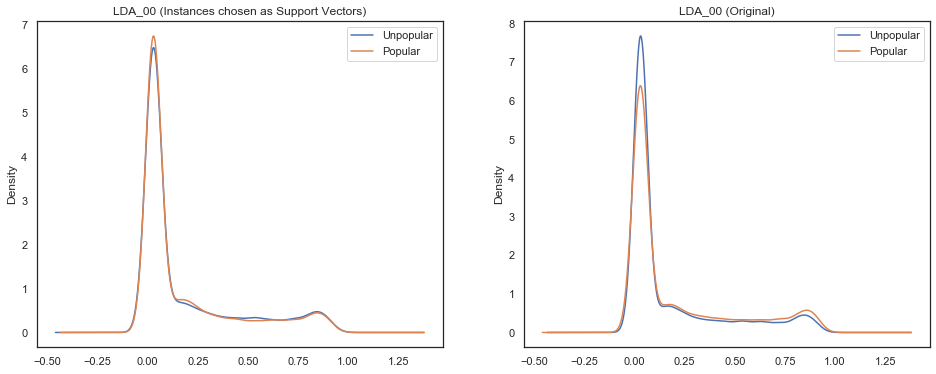

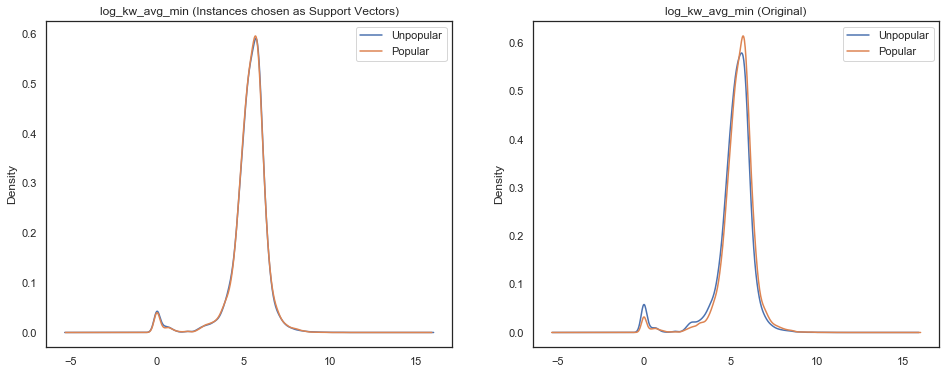

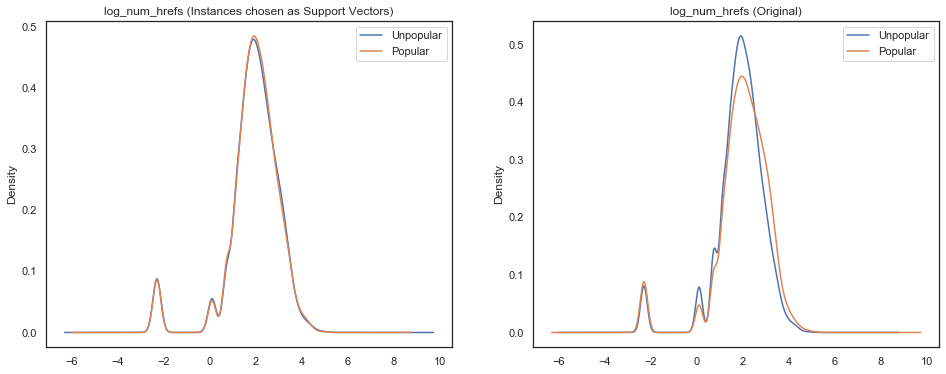

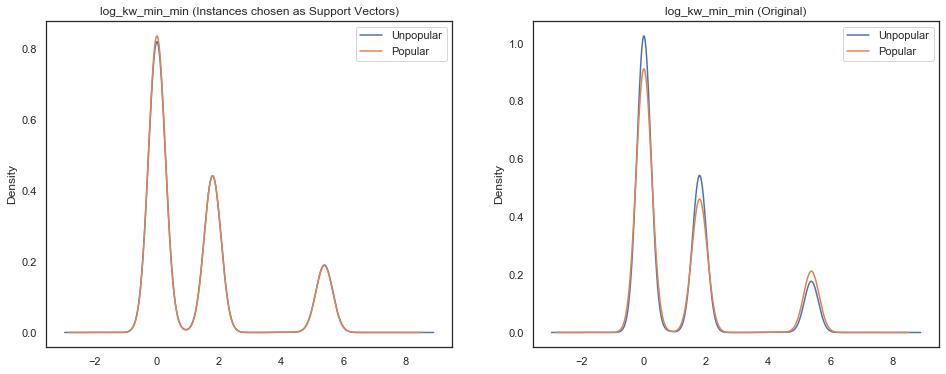

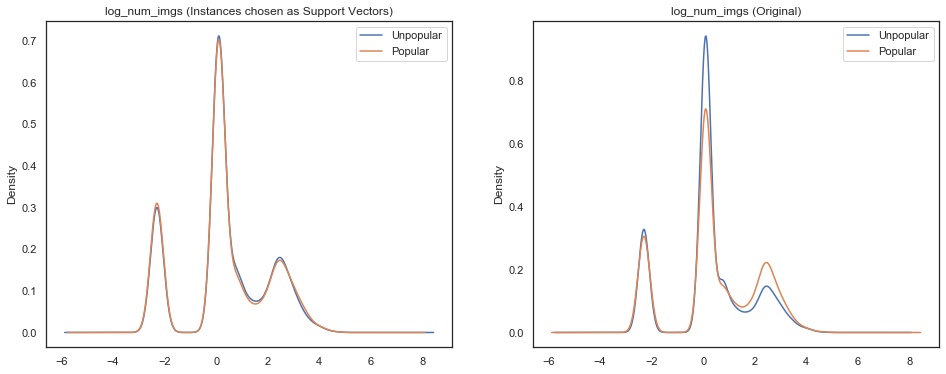

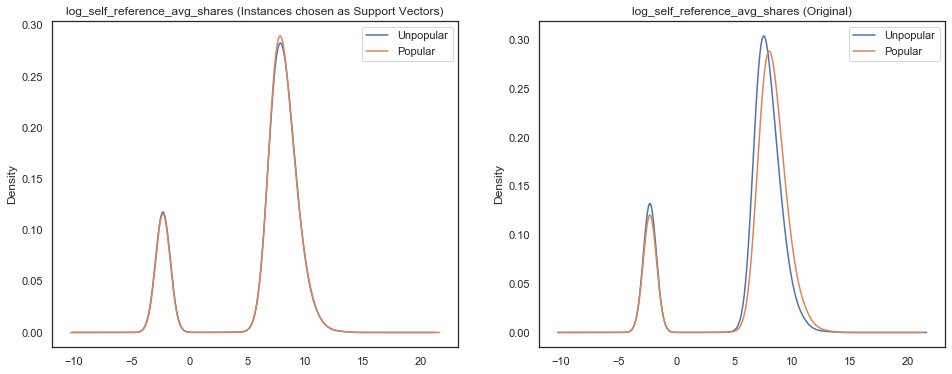

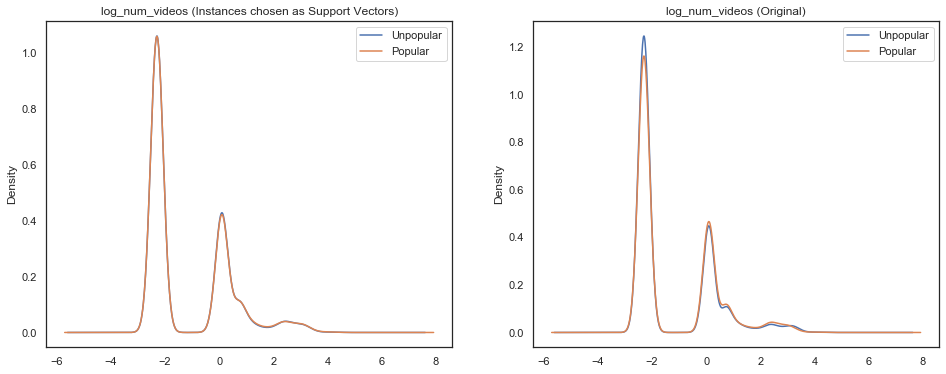

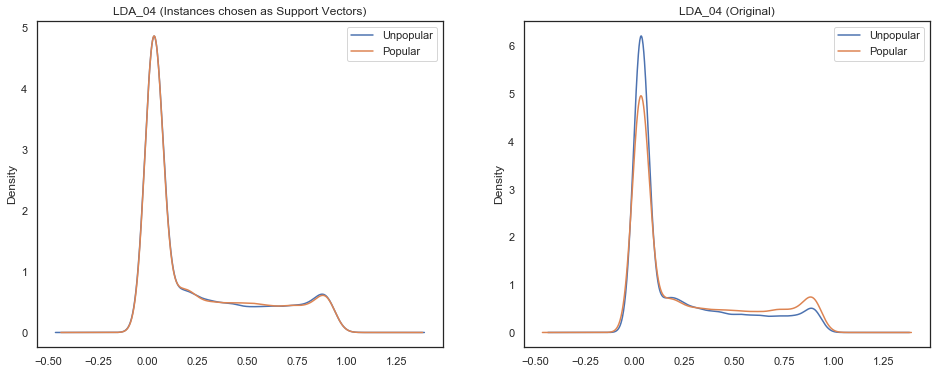

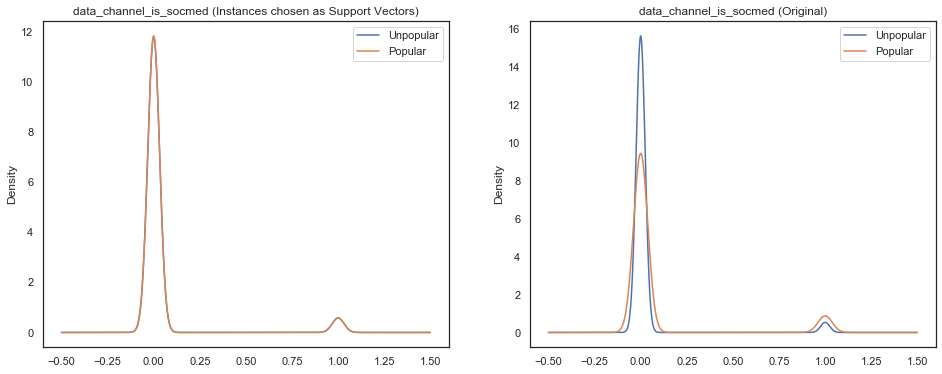

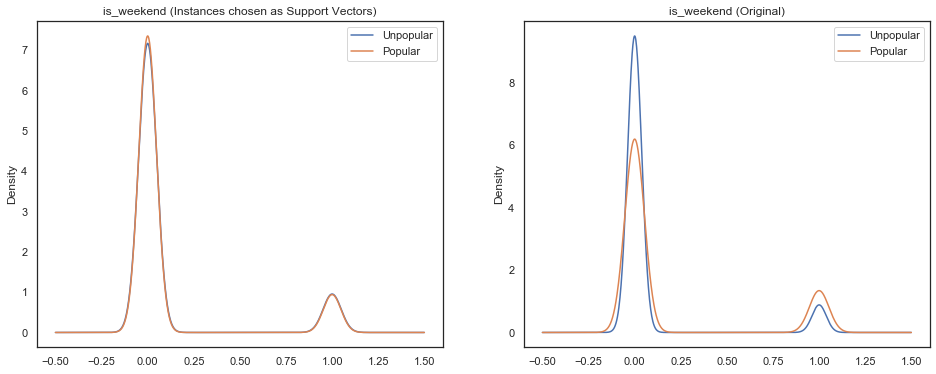

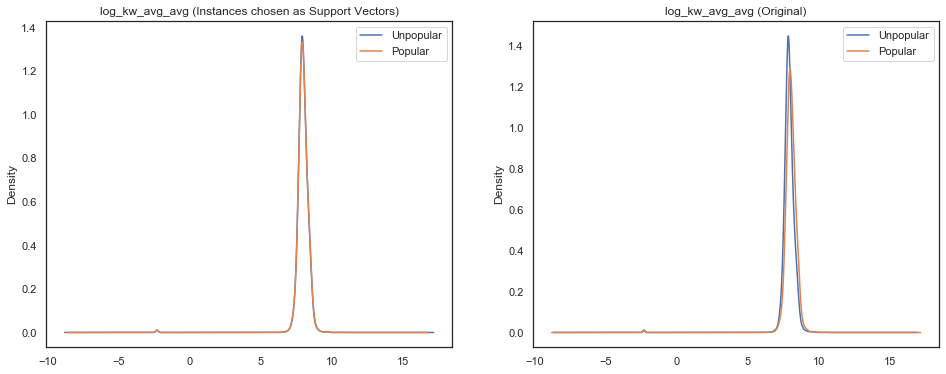

In [35]:
# plot KDE of 20 variables from the selected 33 variables from SVM as mentioned above

from pandas.plotting import boxplot

df_grouped_support = df_support.groupby(['popular']) # group the original data and the support vectors
df_grouped = df.groupby(['popular'])


# 23 selected variables
vars_to_plot = ['LDA_02','data_channel_is_entertainment','log_n_non_stop_unique_tokens','weekday_is_wednesday',
                'weekday_is_tuesday','LDA_01','log_kw_min_max','abs_title_subjectivity','title_sentiment_polarity','LDA_00',
                'log_kw_avg_min','log_num_hrefs','log_kw_min_min','log_num_imgs','log_self_reference_avg_shares',
                'log_num_videos','LDA_04','data_channel_is_socmed','is_weekend','log_kw_avg_avg']

for v in vars_to_plot:
    plt.figure(figsize=(16,6))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Unpopular','Popular'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Unpopular','Popular'])
    plt.title(v+' (Original)')

<a id='SVM-Model2'></a>
##### 1.3.2 SVM - Model 2 ( kernel='rbf', C=0.5, degree=3, gamma='auto' )
Use SVM methods with different kernels to test the top 23 weighted variables from the logistic regression model. 

In [36]:
# select top 23 weighted parameters from linear regression model
# repeat SVM analysis to see if accuracy is affected by downselect

df_v23 = ['LDA_02','data_channel_is_entertainment','log_n_non_stop_unique_tokens','weekday_is_wednesday',
          'weekday_is_tuesday','LDA_01','log_kw_min_max','weekday_is_thursday','rate_negative_words',
          'data_channel_is_lifestyle','abs_title_subjectivity','title_sentiment_polarity','LDA_00',
          'log_kw_avg_min','log_num_hrefs','log_kw_min_min','log_num_imgs','log_self_reference_avg_shares',
          'log_num_videos','LDA_04','data_channel_is_socmed','is_weekend','log_kw_avg_avg', 'popular']

df_svm_v23 = df[df_v23].copy()

In [37]:
if 'popular' in df_svm_v23:
    y = df['popular'].values  # set 'popular' as dependent
    del df_svm_v23['popular'] # remove from dataset
    X = df_svm_v23.values      

In [38]:
from sklearn.model_selection import ShuffleSplit
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations, test_size  = 0.2)                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [39]:
# run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # scale attributes by the training set
    scl_obj = StandardScaler()
    scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
     
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test)

In [40]:
## SVM_Model_2 (kernel='rbf', C=0.5, degree=3, gamma='auto')

start_time_svm2 = time.time()

svm_clf_m2 = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto')
svm_clf_m2.fit(X_train_scaled, y_train)
y_hat_m2 = svm_clf_m2.predict(X_test_scaled) 

acc_m2 = mt.accuracy_score(y_test,y_hat_m2)
conf_m2 = mt.confusion_matrix(y_test,y_hat_m2)
print('accuracy:', acc_m2 )
print(conf_m2)

end_time_svm2 = time.time() - start_time_svm2
used_time_svm2 = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(end_time_svm2))
print(used_time_svm2) 

accuracy: 0.6617480136208853
[[2702 1272]
 [1410 2545]]
Execution took: 0:01:50 secs (Wall clock time)


<a id='SVM-Model3'></a>
##### 1.3.3 SVM - Model 3 (kernel='linear', C=0.5, degree=3, gamma='auto'


In [41]:
## SVM_Model_3 (kernel='linear', C=0.5, degree=3, gamma='auto')

start_time_svm3 = time.time()

svm_clf_m3 = SVC(kernel='linear', C=0.5, degree=3, gamma='auto') 
svm_clf_m3.fit(X_train_scaled, y_train) 

y_hat_m3 = svm_clf_m3.predict(X_test_scaled) # get test set precitions

acc_m3 = mt.accuracy_score(y_test,y_hat_m3)
conf_m3 = mt.confusion_matrix(y_test,y_hat_m3)
print('accuracy:', acc_m3 )
print(conf_m3)

end_time_svm3 = time.time() - start_time_svm3
used_time_svm3 = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(end_time_svm3))
print(used_time_svm3) 

accuracy: 0.6459831000126119
[[2554 1420]
 [1387 2568]]
Execution took: 0:02:05 secs (Wall clock time)


<a id='SVM-Model4'></a>
##### 1.3.4 SVM - Model 4 (kernel='poly', C=0.5, degree=3, gamma='auto')

In [42]:
## SVM_Model_4 (kernel='poly', C=0.5, degree=3, gamma='auto')

start_time_svm4 = time.time()

svm_clf_m4 = SVC(kernel='poly', C=0.5, degree=3, gamma='auto')
svm_clf_m4.fit(X_train_scaled, y_train)
y_hat_m4 = svm_clf_m4.predict(X_test_scaled)

acc_m4 = mt.accuracy_score(y_test,y_hat_m4)
conf_m4 = mt.confusion_matrix(y_test,y_hat_m4)
print('accuracy:', acc_m4 )
print(conf_m4)

end_time_svm4 = time.time() - start_time_svm4
used_time_svm4 = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(end_time_svm4))
print(used_time_svm4) 

accuracy: 0.6496405599697314
[[2742 1232]
 [1546 2409]]
Execution took: 0:01:27 secs (Wall clock time)


<a id='SVM-Model5'></a>
##### 1.3.5 SVM - Model 5 (kernel='sigmoid', C=0.5, degree=3, gamma='auto')

In [43]:
## SVM_Model_5 (kernel='sigmoid', C=0.5, degree=3, gamma='auto')

start_time_svm5 = time.time()

svm_clf_m5 = SVC(kernel='sigmoid', C=0.5, degree=3, gamma='auto')
svm_clf_m5.fit(X_train_scaled, y_train) 
y_hat_m5 = svm_clf_m5.predict(X_test_scaled)

acc_m5 = mt.accuracy_score(y_test,y_hat_m5)
conf_m5 = mt.confusion_matrix(y_test,y_hat_m5)
print('accuracy:', acc_m5 )
print(conf_m5)

end_time_svm5 = time.time() - start_time_svm5
used_time_svm5 = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(end_time_svm5))
print(used_time_svm5) 

accuracy: 0.5589607768949426
[[2281 1693]
 [1804 2151]]
Execution took: 0:01:27 secs (Wall clock time)


<a id='SVMModelsAccuracyScores&Summary'></a>
#### 1.3.6 - SVM Model's Accuracy Scores & Summary


###### Model Accuracy Scores 
 1. [SVM Model 1:](SVM-Model1Kernel=rbf-C=.5)
     * Kernel = rbf 
     * C = 0.5
         * Accuracy of: 0.6405599697313659 
         * Execution Time: 0:01:09 secs


 2. [SVM Model 2:](#SVM-Model2-23-Kernel=rbf-C=0.5) 
     * Kernel = rbf
     * C = 0.5
         * Accuracy of: 0.660108462605625
         * Execution Time: 0:00:54 secs
    
    
 3. [SVM Model 3:](#SVM-Model3Kernel=linear-C=0.5)
     * Kernel = linear
     * C = 0.5
         * Accuracy of: 0.6452263841594148
         * Execution Time: 0:01:00 secs
    
 
 4. [SVM Model 4:](#SVM-Model4Kernel=poly-C=0.5) 
     * Kernel = poly
     * C = 0.5
         * Accuracy of: 0.6497666792785975 
         * Execution Time: 0:00:44 secs
         
 
 5. [SVM Model 5:](#SVM-Model5Kernel=sigmoid-C=0.5) 
     * Kernel = sigmoid 
     * C = 0.5
         * Accuracy of: 0.5573212258796821
         * Execution Time: 0:00:57 secs


###### Summary
 * Most Accurate Model:
     * The most accurate of our five Support Vector Machine Models was Model Number 2 that used the rbf kernel, C = 0.5, and included the top 23 weighted attributes. This model was able to predict whether an article would be popular or not with 66% accuracy. This model also took the longest of all our models to execute at 1 minute & 9 seconds.
     
     
     
 * Least Accurate Model:
     * The least accurate of our five Support Vector Machine Models was Model Number 5 that used sigmoid kernel & c = 0.5. This model was able to predict whether an article would be popular or not with 55% accuracy. This model was the second quickest of all our models to execute at 57 seconds.

<a id='ModelAdvantages'></a>
### Section 2 - Model Advantages
[Back to top of Notebook](#BacktoTop)

For this section, we wanted to compare the logistic regression and SVM models based on their accuracy and execution time.

To see a summary of the logistic regression models that we ran in section 1, please refer to [1.2.7 - Logistic Regression Model Accuracy Scores & Summary](#LogisticRegressionModelsNoWeightAccuracyScores&Summary). This summary shows that out of the 6 models that we ran, our most accurate logistic regression model was Model 2 with an L2 penalty and C = 0.1 giving an accuracy = 0.6380 and execution time of 2 seconds. Looking at the other models, there does seem to be some variation on accuracy ranging from 0.5017 - 0.6329 depending on whether the type of penalty (L1 or L2) applied or the C value. The execution time for all these models is pretty fast and rather consistent ranging only between 2-3 seconds.

For a summary of the SVM models, please refer to [1.3.6 - SVM Model's Accuracy Scores & Summary](#SVMModelsAccuracyScores&Summary). Here we can see that our most accurate model is Model 2 (kernel='rbf', C=0.5, degree=3, gamma='auto') with an accuracy = 0.6601 and execution time of  54 seconds. Going through all the SVM models, there really didn't seem to be as large of a variation in accuracy, ranging from 0.5573 to 0.6601, when compared to the logistic regression models discussed above. However, we did notice right away that the execution times were signficantly longer, in the range of 44 seconds to 1 minute 9 seconds, when compared to the logistic regression model execution times.

Considering the summary for both model types discussed above, we can see that the advantage of a logistic regression model is the faster execution times while for the SVM model the advantage is that it can acheive a higher accuracy score.

Esssentially, it depends on what the researchers' main criteria are for the classification or prediction task at hand. Even though the SVM models do tend to have higher execution times, 1 minute to run a single model still seems reasonable. However, this could start to drastically increase when trying to scale up to a much larger data set or working with slower / older computers. Since the objective for us is to build a classification / prediction model with the highest accuracy score, we believe the SVM models are more suitable even at the expense of a longer execution time.

<a id='InterpretFeatureImportance'></a>
### Section 3 - Interpret Feature Importance
[Back to top of Notebook](#BacktoTop)

<a id='ListAttributesIncludedinLogisticRegressionModel1'></a>
#### 3.1 List Attributes Included in Logistic Regression Model 1

To begin with, we wanted to take our first trained logistic regression Model 1 (containing an L2 penalty and the default C = 1.0 value) and see if we could interpret its attribute weights.

In [44]:
# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

n_tokens_title has weight of -0.028102818677661772
num_keywords has weight of 0.010158954962856834
data_channel_is_lifestyle has weight of 0.038997084236255114
data_channel_is_entertainment has weight of -0.5064637961480126
data_channel_is_socmed has weight of 0.3985202500190097
kw_avg_max has weight of 2.1390186086378236e-07
weekday_is_monday has weight of -0.08665117832812409
weekday_is_tuesday has weight of -0.22016527919725962
weekday_is_wednesday has weight of -0.21282429627587637
weekday_is_thursday has weight of -0.16595112502465117
weekday_is_friday has weight of 0.0025062946772835553
is_weekend has weight of 0.5478121284608931
LDA_00 has weight of 0.2017840032491617
LDA_01 has weight of -0.16178250201118718
LDA_02 has weight of -0.5894354712562674
LDA_03 has weight of 0.12599942825506452
LDA_04 has weight of 0.28721960763662574
rate_negative_words has weight of -0.19012466811386963
min_positive_polarity has weight of -0.051257014241296375
min_negative_polarity has weight of 0.

The list above shows the attributes that make up Model 1 with their associated weights. Even though we can see the magnitude and direction (positive / negative) of the weight for each attribute, we realized that trying to intrepret the weights without having first normalized the values for each attribute based upon their mean and standard deviation would prove to be a rather complicated.

Even though we can see on this list that kw_avg_max attribute has the largest weight of 5.60, it is difficult to compare it to other attributes such as log_kw_avg_min which would seem like it should be comparable, but is actually measured on a logarthmic scale rather than a simple numeric one which explains the much smaller weight of 0.09.

For this reason, we decided to proceed below with normalizing the attribute values so that all the attributes are measured on the same dynamic range. By doing so, we believe that the mangitude of the weights will better reflect their predictive power for our logistic regression model and will be more intuitive to interpret.

[Back to top of Section 3](#InterpretFeatureImportance)

<a id='NormalizeWeightsforListedAttributesFromLogisticRegressionModel1'></a>
#### 3.2 Normalize Weights for Listed Attributes From Logistic Regression Model 1

In [61]:
from sklearn.preprocessing import StandardScaler

# normalize the features based upon the mean and standard deviation of each column. 
 
# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is 0.05 to constrain the model more
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars = sorted(zip_vars)
coefList = []
colNameList = []
for coef, name in zip_vars:
    coefList.append(coef[0])
    colNameList.append(name)
    print(name, 'has weight of', coef[0]) # now print them out

C:\Users\Sohum Pednekar\projNlp\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy: 0.6415689242022954
[[2612 1362]
 [1480 2475]]
num_keywords has weight of -0.19794345547118855
n_tokens_title has weight of -0.1898424977877733
data_channel_is_lifestyle has weight of -0.1489221078388612
weekday_is_monday has weight of -0.08861083455336984
data_channel_is_entertainment has weight of -0.0738299064056185
data_channel_is_socmed has weight of -0.07331885871760477
weekday_is_tuesday has weight of -0.05550888836684692
weekday_is_thursday has weight of -0.034075066177079796
weekday_is_wednesday has weight of -0.02910865153400406
kw_avg_max has weight of -0.023928025640321277
weekday_is_friday has weight of 0.024480243912239307
is_weekend has weight of 0.05134125581324807
LDA_01 has weight of 0.06390377552760382
LDA_00 has weight of 0.08945666429247787
rate_negative_words has weight of 0.09451183226785267
min_positive_polarity has weight of 0.09692412903129884
LDA_02 has weight of 0.1049288066124736
LDA_04 has weight of 0.10876297777959924
LDA_03 has weight of 0.11676

The list above shows the same attributes as in the previous section but after their values have been normalized. The sign (negative / positive) for the weights has been retained, however, now they are bound by a (-1 to 0) or (0 to 1) scale depending on the sign. Unlike the previous section, there are no attributes with large weights such as 4.70 for kw_avg_min mentioned earlier. Now we can more easily compare this attribute to say log_kw_avg_min with a weight of 0.04 since they are both being measured on the same dynamic scale.

Since the long list above consists of 33 attributes, we decided that rather than trying to search and sort through the list, it would be easier to visualize and compare the attribute weights with a bar chart as shown below. 

[Back to top of Section 3](#InterpretFeatureImportance)

<a id='BarChartShowingNormalizedAttributesWeights'></a>
#### 3.3 Bar Chart Showing Normalized Attributes Weights 

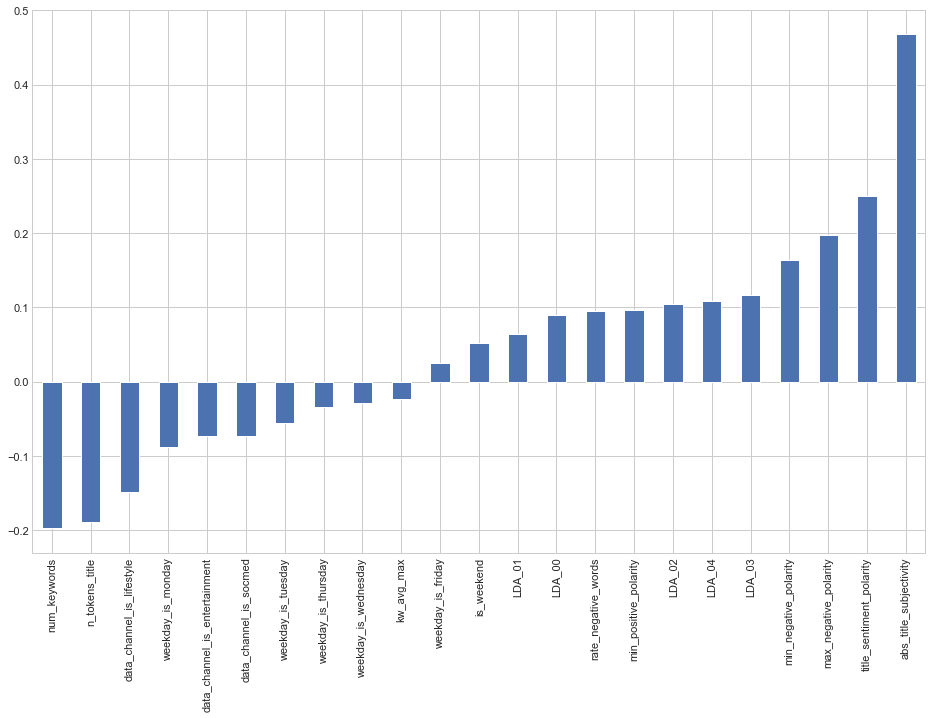

In [62]:

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,10))
weights = pd.Series(coefList,index= colNameList)
weights.plot(kind='bar')

plt.show()

The barchart above provides a good way to visualize the magnitude and direction of the attribute weights. Just taking a quick look we can see that the attributes that stick out right away are *log_kw_avg_avg* (weight = +0.48), *is_weekend* (+0.24), *LDA_02* (-0.23), *data_channel_is_entertainment* (-0.20), *data_channel_is_socmed* (+0.19), *log_n_non_stop_unique_tokens* (-0.12), and *LDA_04* (+0.11).

Despite this chart providing an easier way to look at the attribute weights, we wanted to take it a step further a plot them again but this time based on the absolute value of their weights and sort them in descending order to really highlight which attributes are most influential for our logistic regression model.

[Back to top of Section 3](#InterpretFeatureImportance)

<a id='InterpretationOfAttributeWeights'></a>
#### 3.5 Interpretation Of Attribute Weights

We feel that the barchart above provides the best way to visualize the importance of attributes included in our logistic regression model based on the absolute value of their weight.

Clearly, the most important attribute in this model is the *log_kw_avg_avg*, or the log transformed average number of shares of the average keyword, which far outweighs the rest of the attributes shown. This is attribute is measuring the average number of social media shares for previously published Mashable articles containing an average number of specified keywords. Despite the complicated definition, this attribute is essentially suggesting that, on average, the more keywords included in an article, the more likely that article will be classified as popular. Furthermore, the large weight value for this attribute means that it has much higher influence on the predictive power of our logistic regression model when compared to the other attributes. In practical terms, we would recommend that publishers and authors looking to create new articles for Mashable, consider including keywords associated with a high number of shares.

The next most important attribute *is_weekend* simply tells us whether an article was published on the weekend or not. For our lab 1 assignment, we discussed how we noticed the popularity of an article is strongly influenced by the day of the week on which is published, and more specifically we pointed out that the weekend tends to have a higher proportion of popular articles when compared to the weekdays. Our understanding was that readers with a typical work schedule tend to have more leisure time on the weekend to browse through a larger amount of online articles which in turn leads to more of those articles being shared with their friends and family. Again, considering the large weight value for this attribute means that it has a large influence on the predictive power of our logistic regression model and should definitely be conisdered by publishers and authors alike when creating new articles.

Going down the list, we next see the *LDA_02* attribute which is an abbreviation for Latent Dirichlet Allocation which is a specific measure related to natural language processing. We would need to perform further research to properly interpret this attribute.

Following on, the *data_channel_is_entertainment* and *data_channel_is_socmed* attributes tells us whether an article is allocated to the entertainment or social media categories. The large weights for these attributes suggest that they influence the predictive power of our logistic regression model to a higher degree when compared to the other data channels such as business or lifestyle. 

For the sake of shortening this description, since there are 33 inidivual attributes to look at, we wanted to summarize our interpretation of the attributes as a whole. First, we noticed that the most important attributes based on their weights were in line with our findings during the data exploration phase of our lab 1 assignment. These findings also seemed to line  up with our intuition on what would make an article popular or not popular based on their associated social media shares with things such as embedding hyperlinks to popular articles, including images and videos, publishing articles on the weekend, and producing articles in popular categories such as social media that majority of the Mashable readers tend to associate and relate with. Surprisingly, there are a lot of attributes such as *LDA_02* and *log_n_non_stop_unique_tokens* often used for natural language processing that have a relatively high weight. This tells us that performing further research related to these attributes and even reaching out to an NLP domain expert, could be useful to help us understand the intricies involved with these measures and how they specifically influence the predictive power of the model.

[Back to top of Section 3](#InterpretFeatureImportance)

<a id='RecommendationForReducingOverfitting'></a>
#### 3.6 Recommendation For Reducing Overfitting

Having looked at the attribute importance ranking in the previous section's barchart, we started thinking about how we could use these observations to further improve our logistic regression model going forward. Even though we have already addressed and removed variables that showed a high degree of mutlicollinearity in seciton 0.8 prior to building our models, we still noticed that there are several variables such as *title_sentiment_polarity* and *abs_title_sentiment_polarity* that are slightly different measures of the same thing. For this reason, we believe that removing some of these variables that seem to be closely related or within the same category but also have a low weight (such as 0.05 for example) could be beneficial for improving our logsitic regression model by reducing the likelihood of overfitting. This will be further investigated in our future lab assignment 2.

[Back to top of Section 3](#InterpretFeatureImportance)

<a id='InterpretSupportVectors'></a>
### Section 4 - Interpret Support Vectors
[Back to top of Notebook](#BacktoTop)

<a id='SummaryOfSupportVectorsFromSVMModel1'></a>
#### 4.1 Summary Of Support Vectors From SVM Model 1

For this interpretation section, we decided to use our SVM Model 1 since it achieved the highest accuracy rate of 0.66. To get a feel for the resulting support vectors that were selected, we wanted to see how many instances and attributes were included by using the `shape` function.

In [50]:
# check the support vectors
print(svm_clf.support_vectors_.shape)

(24444, 33)


The output results above show that compared to the original data set containg 39,644 instances / articles and 61 attributes, our support vector model is using a smaller subset of 24,498 instances and 33 attributes for classification. This is to be expected for prediction / classification models because if they were to use the complete data set (i.e. all 39,644 rows 61 attributes) then this would more than likely result in ovefitting.

Having looked at the general description of the support vectors, our next step below was to look at specifically which attributes were chosen for the support vector model.

In [51]:
# look at the instances that were chosen as support vectors
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24444 entries, 33561 to 12234
Data columns (total 34 columns):
n_tokens_title                   24444 non-null float64
num_keywords                     24444 non-null float64
data_channel_is_lifestyle        24444 non-null float64
data_channel_is_entertainment    24444 non-null float64
data_channel_is_socmed           24444 non-null float64
kw_avg_max                       24444 non-null float64
weekday_is_monday                24444 non-null float64
weekday_is_tuesday               24444 non-null float64
weekday_is_wednesday             24444 non-null float64
weekday_is_thursday              24444 non-null float64
weekday_is_friday                24444 non-null float64
is_weekend                       24444 non-null float64
LDA_00                           24444 non-null float64
LDA_01                           24444 non-null float64
LDA_02                           24444 non-null float64
LDA_03                           24444 non-null

Going through the list above, we were not surprised to find that the same attributes that were chosen for our logistic regression model were also showing up for the SVM one. As discussed in Section 3, most of these attributes seemed to be intuitive in their nature for influencing the popularity of an article which was reflected in their respective weights for the logistic regression model. Below we will explore the KDE plots for several attributes chosen from the above list to understand how they influence the the predictive / classification power for our SVM Model 1.

[Back to top of Section 4](#InterpretSupportVectors)

<a id='SupportVector-log_num_imgs'></a>
#### 4.2 Support Vector - log_num_imgs

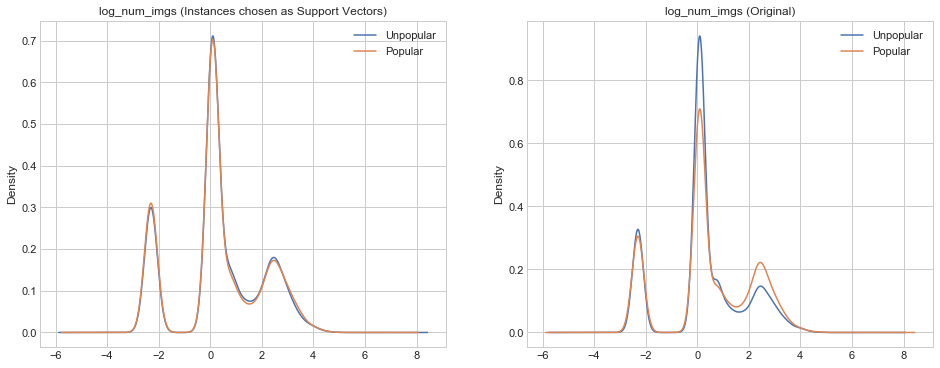

In [52]:
vars_to_plot = ['log_num_imgs']
for v in vars_to_plot:
    plt.figure(figsize=(16,6))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Unpopular','Popular'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Unpopular','Popular'])
    plt.title(v+' (Original)')

The *log_num_imgs* attribute represents the log transformed number of images embedded in an article. The KDE plot above, and specifically the one on the right-hand side representing the original data set, shows that at a value of just below log -2 (pretty much corresponding to 0 images) there isn't a noticeable difference between the popular (orange) and unpopular (dark blue) articles. However, once we go up to log (corresponding to 1 embedded image), the density of unpopular articles at ~ 0.9 far exceeds that of popular articles at a density of ~ 0.65. Moving further into the range between log 1.5 - 3.5 (or 5 - 33 embedded images), this trend reverses with the popular articles overtaking the unpopular ones in density.

Essentially, this is showing us that for articles with no images, the popularity of an article is not greatly influenced. Once we embed a couple of images, for some reason readers tend to respond negatively resulting in more unpopular articles. But as publishers and authors add more images to an article, especially ones that are longer, the readers tend to like that and are more likely to share those articles thus making them popular. This plot helps to show that the popularity of an article differs almost across the entire range for the number of embedded images which helps explain why this attribute can be influential on the predictive power of our support vector machine model.

[Back to top of Section 4](#InterpretSupportVectors)

<a id='SupportVector-log_kw_avg_avg'></a>
#### 4.3 Support Vector - log_kw_avg_avg

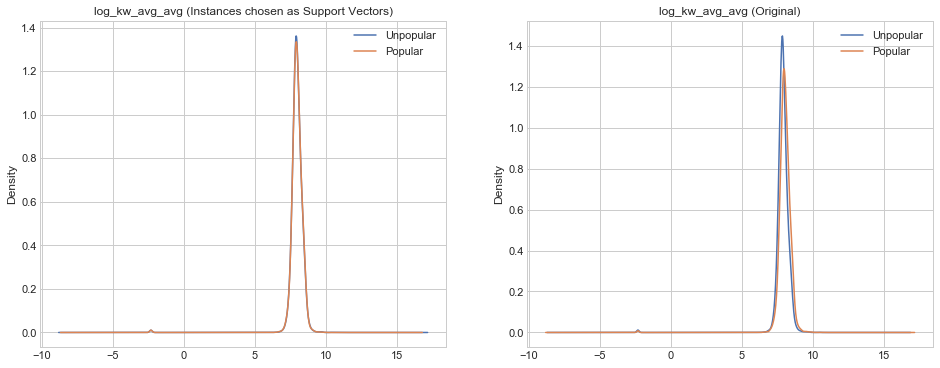

In [53]:
vars_to_plot = ['log_kw_avg_avg']
for v in vars_to_plot:
    plt.figure(figsize=(16,6))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Unpopular','Popular'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Unpopular','Popular'])
    plt.title(v+' (Original)')

As a reminder from section 3, the log_kw_avg_avg represents the log transformed average number of shares of the average keyword which had the highest weight for the logistic regression model. Looking at the KDE plot above, the distribution is pretty much centered around a very large peak at ~ log 8 or ~ 2980 keywords. 

This seems like a large number of keywords for a single article considering the average length of an article for this data set is cointained within a 500 - 800 word count. Perhaps the plot is suggesting that any articles contained above and below this peak are practically equal in terms of populartiy, however, in the region of ~ 2980 keywords there beings to be a large deviation in popularity for articles which is mainly how this attribute influences the predictive power of our SVM model.

[Back to top of Section 4](#InterpretSupportVectors)

<a id='SupportVector-data_channel_is_entertainment'></a>
#### 4.4 Support Vector - data_channel_is_entertainment

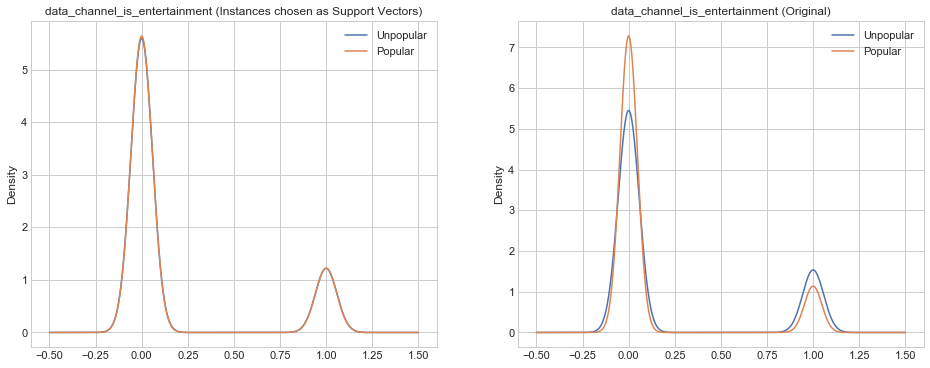

In [54]:
vars_to_plot = ['data_channel_is_entertainment']
for v in vars_to_plot:
    plt.figure(figsize=(16,6))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Unpopular','Popular'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Unpopular','Popular'])
    plt.title(v+' (Original)')

The *data_channel_is_entertainment* attribute describes whether an article belong to the entertainment category (1) or not (0). The KDE plot above provides an interesting insight showing that articles that don't belong to this category, as represented by the large peak around 0.00, have a higher density of popular articles while the reverse is true for the articles that do belong to this channel, as represented by the much smaller peak around 1.00. 

This is consistent with what we expected since this variable had a high weight for our logistic regression model in section 3. Even though the peak around 0 is much larger than the one at 1 simply representing a different sample size of articles, there was a very noticeable difference between the popular and unpopular lines for both peaks. This suggests that in the entertainment data channel, readers might have much stronger preferences on what they like and dislike when compared to other channels. Again, as in the other exampe above, we believe this noticeable difference is how this attribute strongly influences the predictive power of our SVM model.

[Back to top of Section 4](#InterpretSupportVectors)

<a id='SupportVector-title_sentiment_polarity'></a>
#### 4.5 Support Vector - title_sentiment_polarity

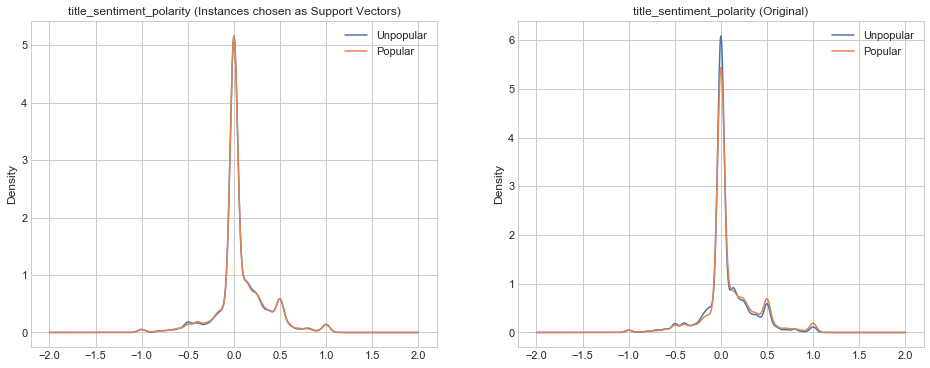

In [55]:
vars_to_plot = ['title_sentiment_polarity']
for v in vars_to_plot:
    plt.figure(figsize=(16,6))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Unpopular','Popular'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Unpopular','Popular'])
    plt.title(v+' (Original)')

The last attribute we wanted to look at for this section was the *title_sentiment_polarity* which measure whether the title of an article results in a negative (sad) or positive (happy) sentiment for the readers. The KDE plot shows a rather jagged distribution with several small peaks throughout, however, the most noticeable feature is the large peak centered around 0 which is a neutral sentiment, neither happy or sad. 

At this peak, the unpopular line has a higher density just above 6 compared to the popular line leveling off at ~ 5.5. This tells us that articles with neutral titles, perhaps a more matter-of-the-fact kind of title compared to a very dramatic one which could invoke certain sentiments and emotions in the readers, are more likely to result in an unpopular article. As we move to the right of that peak towards 1, we notice that the popular line is marginally higher than the unpopular one, meaning that readers tend to like articles with titles that invoke positive thoughts and sentiments in them meaning and are more likely to share those article. We believe that the differences in the popular / unpopular lines that are evident almost throught the entire range on the KDE plot is what explains how this attribute could potentially influence the predictive power of our SVM model. 

[Back to top of Section 4](#InterpretSupportVectors)